# Exploratory Data Analysis-EDA

### Importar librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

### Configuración de visualización

In [3]:
# Configuración de visualización
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

### Cargar datos

In [4]:
data = pd.read_csv('..\API\data_final_ML.csv', encoding='UTF-8')

### Primeros vistazos

In [5]:
# Mostrar las primeras filas del DataFrame
data.head(5)

,title,release_date,release_year,popularity,vote_count,vote_average,names_actors,name_director,budget,revenue,return
0,Double Impact,1991-07-31,1991,6.600651,219.0,5.3,"['Jean-Claude Van Damme', 'Geoffrey Lewis', 'A...",Sheldon Lettich,15000000.0,30102717.0,2.006848
1,Meet the Feebles,1989-08-12,1989,3.336298,68.0,6.4,"['Donna Akersten', 'Stuart Devenie', 'Mark Had...",Peter Jackson,750000.0,0.0,0.000000
2,Princess Kaiulani,2010-05-14,2010,1.818296,14.0,4.8,"[""Q'orianka Kilcher"", 'Barry Pepper', 'Will Pa...",Marc Forby,9000000.0,771499.0,0.085722
3,90 Minutes in Heaven,2015-09-11,2015,4.222496,40.0,5.4,"['Kate Bosworth', 'Hayden Christensen', 'Hudso...",Michael Polish,5000000.0,4842699.0,0.968540
4,"Dude, Where’s My Car?",2000-12-15,2000,10.890236,523.0,5.3,"['Ashton Kutcher', 'Seann William Scott', 'Kri...",Danny Leiner,13000000.0,73180723.0,5.629286


In [6]:
# Información general del DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          5000 non-null   object 
 1   release_date   5000 non-null   object 
 2   release_year   5000 non-null   int64  
 3   popularity     5000 non-null   float64
 4   vote_count     5000 non-null   float64
 5   vote_average   5000 non-null   float64
 6   names_actors   5000 non-null   object 
 7   name_director  5000 non-null   object 
 8   budget         5000 non-null   float64
 9   revenue        5000 non-null   float64
 10  return         5000 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 429.8+ KB


### Nulos

In [7]:
# Chequeo de nulos
nulos = data.isnull().sum()
print("Valores nulos por columna:")
print(nulos)

Valores nulos por columna:
title            0
release_date     0
release_year     0
popularity       0
vote_count       0
vote_average     0
names_actors     0
name_director    0
budget           0
revenue          0
return           0
dtype: int64


### Valores duplicados

In [8]:
# Chequeo de valores duplicados
duplicados = data.duplicated().sum()
print(f'Valores duplicados: {duplicados}')

Valores duplicados: 0


### Tipos de datos

In [9]:
# Tipos de datos
tipos_datos = data.dtypes
print("Tipos de datos por columna:")
print(tipos_datos)

Tipos de datos por columna:
title             object
release_date      object
release_year       int64
popularity       float64
vote_count       float64
vote_average     float64
names_actors      object
name_director     object
budget           float64
revenue          float64
return           float64
dtype: object


### Análisis estadístico de datos

In [10]:
# Descripción estadística
descripcion = data.describe()
print("Descripción estadística del dataset:")
descripcion

Descripción estadística del dataset:


,release_year,popularity,vote_count,vote_average,budget,revenue,return
count,5000.000000,5000.000000,5000.000000,5000.00000,5.000000e+03,5.000000e+03,5.000000e+03
mean,2004.098600,8.876026,588.807200,6.11482,2.732647e+07,6.969459e+07,3.731427e+03
std,9.331082,13.284387,1147.752268,0.94367,3.677010e+07,1.526322e+08,1.861679e+05
min,1980.000000,0.134014,11.000000,2.30000,1.000000e+00,0.000000e+00,0.000000e+00
25%,1998.000000,4.331523,46.000000,5.50000,5.000000e+06,0.000000e+00,0.000000e+00
50%,2006.000000,7.582247,168.500000,6.20000,1.400000e+07,1.209805e+07,9.060524e-01
75%,2012.000000,10.927328,573.250000,6.80000,3.500000e+07,6.964834e+07,2.842407e+00
max,2017.000000,547.488298,14075.000000,9.10000,3.800000e+08,2.787965e+09,1.239638e+07


### Distribuciones de variables numéricas

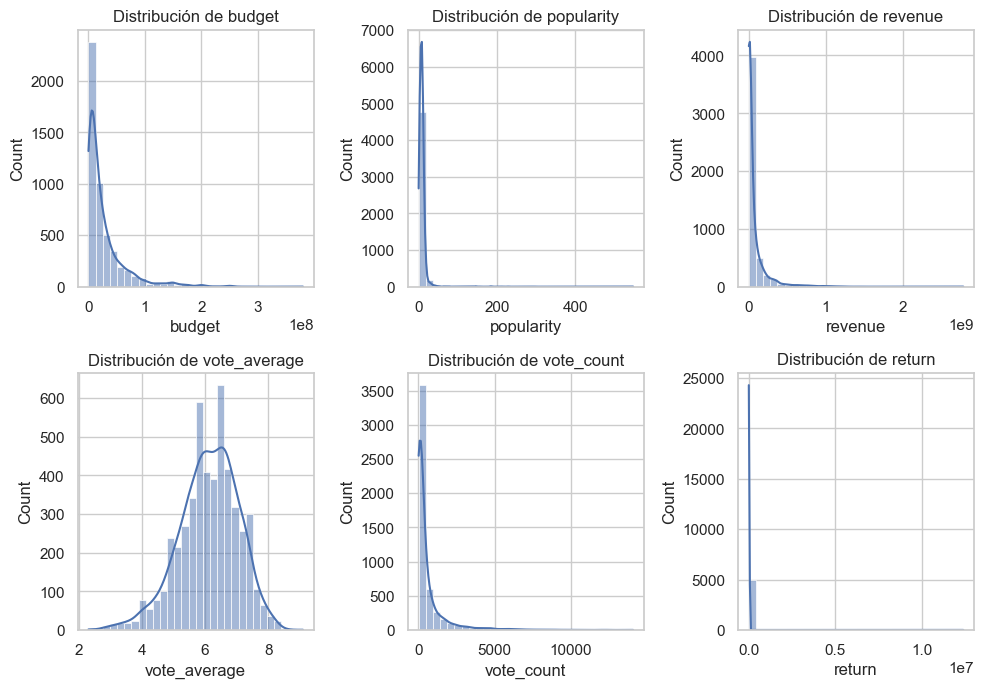

In [11]:
# Distribuciones de Variables Numéricas
numerical_columns = ['budget', 'popularity',
                     'revenue', 'vote_average', 'vote_count', 'return']

plt.figure(figsize=(10, 10))
for i, column in enumerate(numerical_columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'Distribución de {column}')
plt.tight_layout()
plt.show()

### Correlaciones entre variables numéricas

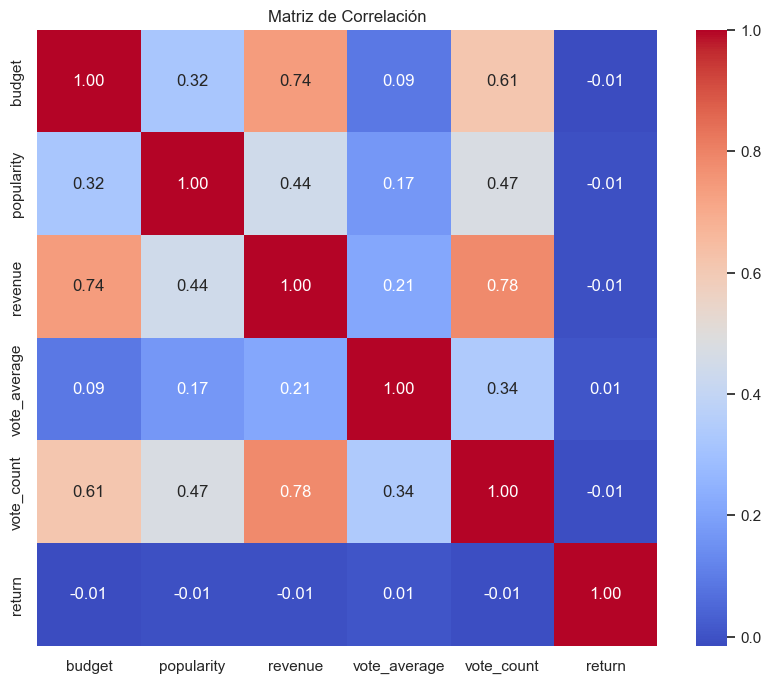

In [12]:
# Correlaciones
correlation_matrix = data[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

### Outliers

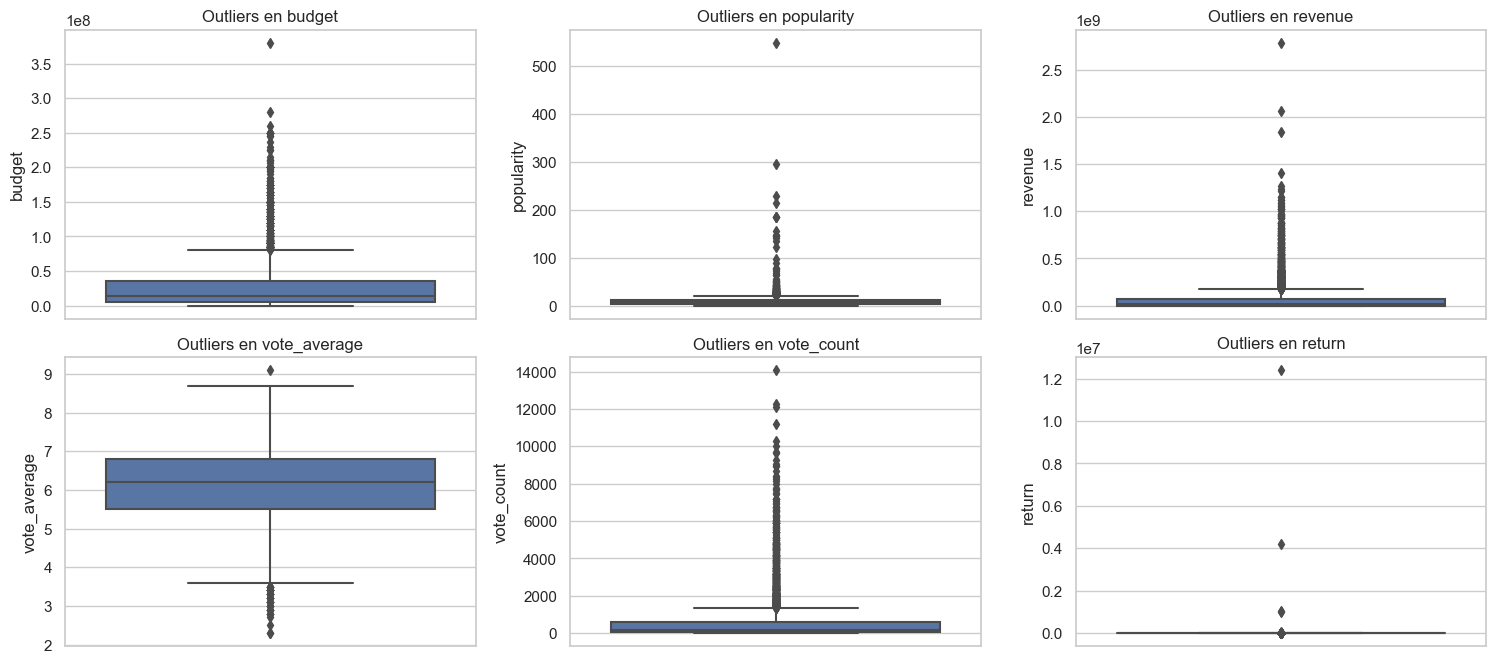

In [13]:
# Deteccion de outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=data[column])
    plt.title(f'Outliers en {column}')
plt.tight_layout()
plt.show()

### Relaciones Bivariadas

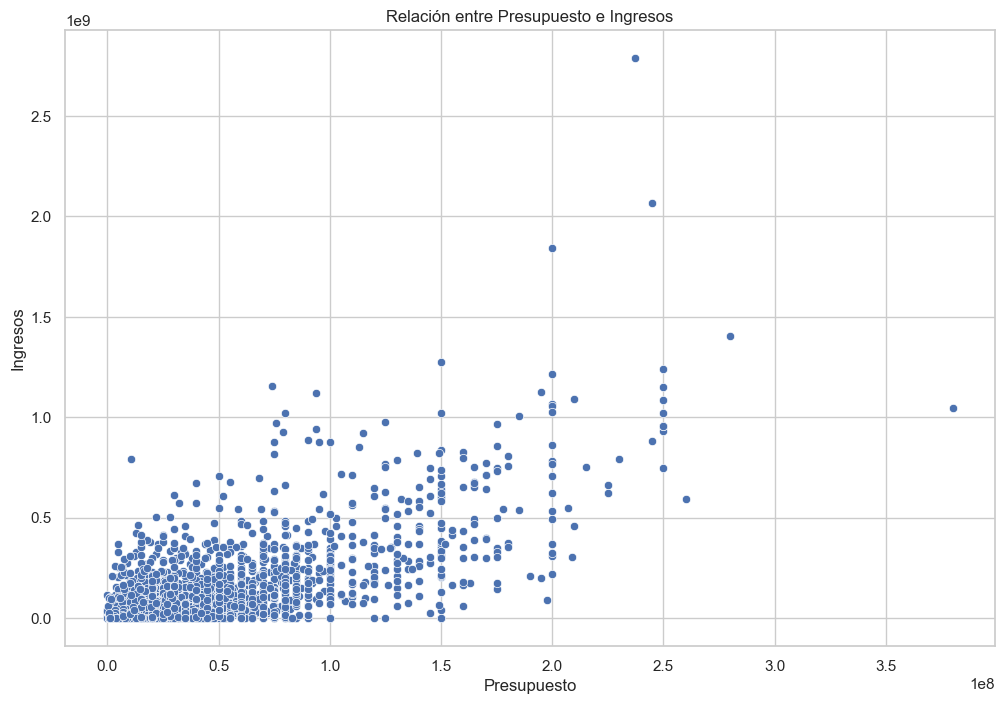

In [14]:
# Relación entre 'budget' y 'revenue'
sns.scatterplot(x='budget', y='revenue', data=data)
plt.title('Relación entre Presupuesto e Ingresos')
plt.xlabel('Presupuesto')
plt.ylabel('Ingresos')
plt.show()

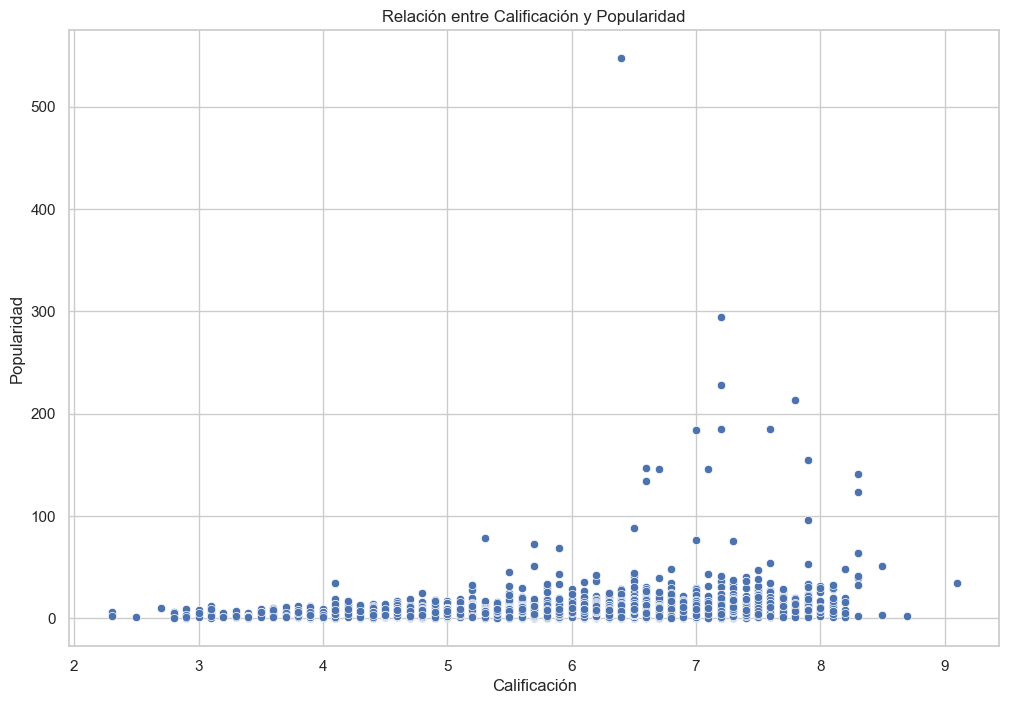

In [15]:
# Relación entre 'vote_average' y 'popularity'
sns.scatterplot(x='vote_average', y='popularity', data=data)
plt.title('Relación entre Calificación y Popularidad')
plt.xlabel('Calificación')
plt.ylabel('Popularidad')
plt.show()

### Nube de palabras

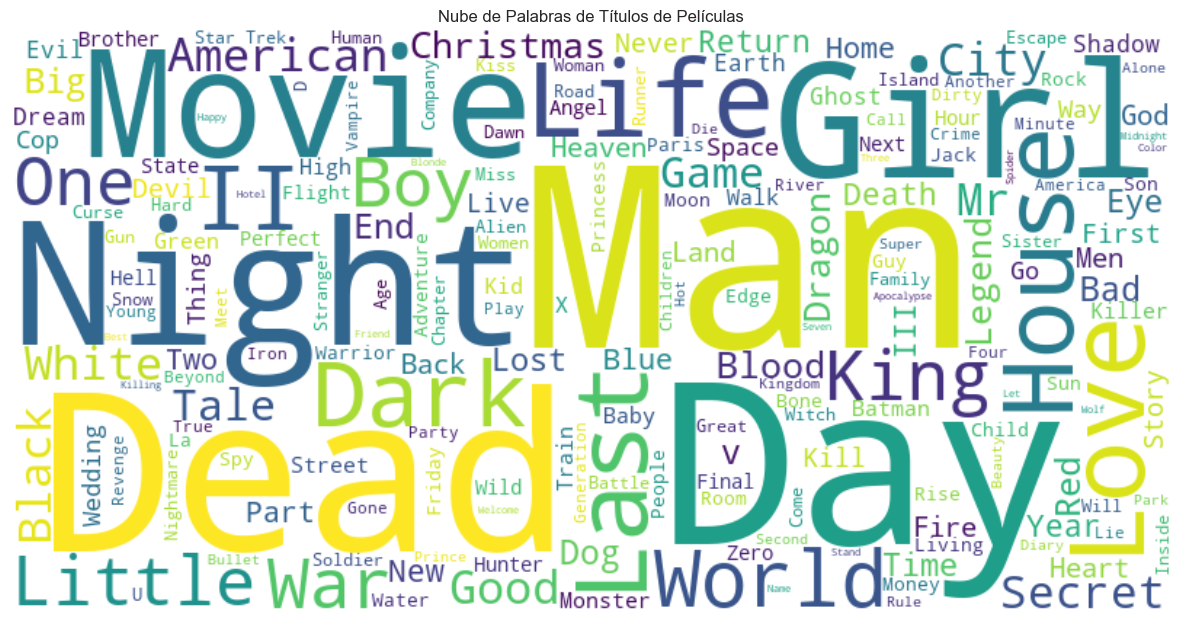

In [16]:
# Crear una nube de palabras para los títulos de las películas
all_titles = ' '.join(data['title'].astype(str))
wordcloud = WordCloud(width=800, height=400, max_words=200,
                      background_color='white').generate(all_titles)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Títulos de Películas')
plt.show()